# Cleaning and Analysing Employee Exit Surveys
In this project, I will be working with exit surveys from employees of the [Department of Education, Training and Employment](https://www.qld.gov.au/education) (DETE) and the [Technical and Further Education](https://tafeqld.edu.au/) (TAFE) institute in Queensland, Australia. The DETE and TAFE surveys can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) respectively.

The aim of this project is to answer these questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Columns concerning how long the participants worked for either institution, the reason for resignation, and the age at when the employment ended will be of interest here. Hence, the first step will be to read the CSV file into pandas and determine the relevant columns.


In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
dete_survey.info()
pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
dete_survey.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN


In [2]:
#exploring the 'SeparationType' column
print(dete_survey['SeparationType'].value_counts())
dete_survey[dete_survey['SeparationType']=='Voluntary Early Retirement (VER)'].head(10)


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
15,16,Voluntary Early Retirement (VER),2012,1995,2004,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,A,A,D,A,D,D,D,D,A,A,A,A,A,A,A,N,A,N,A,N,A,Male,61 or older,NaN,NaN,NaN,NaN,NaN
45,46,Voluntary Early Retirement (VER),2012,1999,2001,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,A,N,A,A,A,SD,D,A,A,A,A,N,N,N,N,A,A,A,A,D,N,Female,46-50,NaN,NaN,NaN,NaN,NaN
46,47,Voluntary Early Retirement (VER),2012,2008,2008,Cleaner,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,NaN,N,N,N,N,N,A,A,A,A,N,D,D,N,N,A,N,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
82,83,Voluntary Early Retirement (VER),2012,1991,2010,Deputy Principal,NaN,Not Stated,NaN,Permanent Full-time,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,N,N,SD,SD,A,D,SD,SD,SD,SD,SD,SD,N,SD,N,SD,SD,SD,SD,N,A,Female,51-55,Yes,NaN,NaN,NaN,NaN
94,95,Voluntary Early Retirement (VER),2012,1973,1976,Teacher,Primary,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,A,N,SD,D,N,SD,SD,D,N,N,N,N,D,N,N,D,D,N,N,D,D,Female,51-55,NaN,NaN,NaN,NaN,Yes
129,130,Voluntary Early Retirement (VER),2012,1975,1996,Head of Curriculum/Head of Special Education,NaN,North Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,A,NaN,N,A,A,SD,N,A,A,A,A,SA,A,A,NaN,A,SA,A,A,N,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
134,135,Voluntary Early Retirement (VER),2012,1983,1988,Business Service Manager,NaN,Far North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,A,N,SA,A,A,SD,N,A,A,SA,SA,SA,A,SA,A,A,A,A,SA,A,SA,Male,46-50,NaN,NaN,NaN,NaN,NaN
154,155,Voluntary Early Retirement (VER),2012,1971,2005,Public Servant,AO5-AO7,Central Office,Training and Tertiary Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,A,N,SD,A,A,N,N,N,N,N,N,N,SD,N,N,A,A,A,A,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


From the results above, I have determined that some of the relevant columns in the DETE dataset are:
+ ID: A unique number to identify each participant	
+ SeparationType: The reason why the employment ended	
+ Cease Date: The month and year the employment ended
+ DETE Start Date: The year the employment began
+ Age: The age of the participant when the employment ceased

1. There are other columns concerning reasons for resignation. 
2. Columns[28:49] have ambiguous responses and some of the columns are redundant (example: dete_survey['Worklife balance'] and dete_survey['Work life balance'] concern the same issue). Therefore, columns[28:49] will be deleted. 
3. Also, some responses (like row[0], DETE Start Date) are "Not Stated". I'll delete the unnecessary rows and set "Not Stated" to be null.

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [4]:
tafe_survey.info()
tafe_survey.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Columns 18-65 are not relevant to this project because they do not concern contributing factors. I want to look closely at column 17 (Main Factor. Which of these was the main factor for leaving?)

In [5]:
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts(dropna = False)


NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Travel                                        2
Study                                         2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

In [6]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

From the results above, I have determined that some of the relevant columns in the TAFE dataset are:
+ Record ID: A unique number to identify each participant
+ Reason for ceasing employment: The reason why the employment ended
+ LengthofServiceOverall. Overall Length of Service at Institute (in years): The number of years the participant was employed 
+ CurrentAge. Current Age: The age of the participant when the employment ceased

In [7]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

To standardise the the columnm names, all the letters will be lowercase, the spaces between words will be replaced with underscores, and the spaces at the ends of column names will be removed.

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Some columns in the tafe and dete datasets are similar, but have different names (e.g. 'RECORD ID' and 'id'). Because the two datasets are going to be merged, my next step will be to replace some of the tafe column names with those of the dete dataset. Some unnecessarily long column names will also be changed.

In [9]:
tafe_survey_updated.rename(columns = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age':'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service' }, inplace = True)
tafe_survey_updated.head()


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [11]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Because this project concerns only employees who resigned from either institute, I will delete the rows where the emploree exit was due to other reasons. 

In [12]:
# Updating all the values that contain '-'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [13]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
# to check. there should be 311 Resignation rows
dete_resignations['separationtype'].value_counts()

Resignation    311
Name: separationtype, dtype: int64

In [14]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

Next, I'll update the dete cease_date column to contain just the year the employment ended. I'll also change the data type to float to enable calculation of the number of years employed.

In [15]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [16]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [17]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

In [18]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [19]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [20]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [21]:
tafe_resignations.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


After checking the datasets,there seem to be no outliers or other problems among the years. 

The next step will be to create a column for the period of employment for the dete dataset (the tafe dataset already has one, 'institute_service'). The number of years of service will be the difference between 'dete_start_date' and 'cease_date'.

In [22]:
dete_resignations['institute_service'] =dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


Because one of the concerns of this project is employee dissatisfaction, I'll be looking at the columns to determine which of them indicate some sort of dissatisfaction or the other.

In the dete dataset, such columns are:
+ job_dissatisfaction 
+ dissatisfaction_with_the_department 
+ physical_work_environment
+ lack_of_recognition 
+ lack_of_job_security
+ employment_conditions
+ work_life_balance
+ workload

For the tafe dataset:
+ Contributing Factors. Dissatisfaction	
+ Contributing Factors. Job Dissatisfaction

For each dataset, I'll create a new column, 'dissatisfied', that will contain 'True' if any of the above columns say 'True'. If all of the above columns have 
'False', the column will be 'False', indicating that the employee did not resign due to some sort of dissatisfaction.

In [23]:
#for the dete dataset
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'employment_conditions', 'work_life_balance', 'workload']].any(1, skipna = False)
dete_resignations['dissatisfied'].value_counts(dropna = False)
dete_resignations_up = dete_resignations.copy()


In [24]:
# To check the unique values of the tafe columns
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [25]:
#for the tafe dataset, the columns must be updated to true or false
tafe_dissatisfaction = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
def tafe_true(val):
        if val == '-':
            return False
        elif pd.isnull(val):
            return np.nan
        else:
            return True

# Next is to create the 'dissatisfied' column
tafe_resignations['dissatisfied']= tafe_resignations[tafe_dissatisfaction].applymap(tafe_true).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

I have created a 'dissatisfied' column for each dataset. If the value is True, some form of dissatisfaction contributed to the employees resignation.
The next step is to combine the tefe and dete datasets.

First, I'll create a new column for each dataset, so that their rows can be distinguished after merging. The column will be 'institute' and in the dete_resignations_up dataset, it will contain 'DETE'. Otherwise, it will contain 'TAFE'.

In [26]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = 0)
combined

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,Contributing Factors. Study,Contributing Factors. Travel,Institute,WorkArea,aboriginal,age,business_unit,career_move_to_private_sector,career_move_to_public_sector,cease_date,classification,dete_start_date,disability,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,nesb,none_of_the_above,physical_work_environment,position,region,relocation,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,NaN,True,False,2012.0,Primary,2005.0,NaN,False,False,False,Permanent Full-time,Female,4.000000e+00,False,DETE,7,False,False,False,False,False,NaN,False,False,Teacher,Central Queensland,False,NaN,2006.0,Resignation,NaN,False,NaN,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-45,Education Queensland,True,False,2012.0,NaN,1994.0,NaN,False,True,True,Permanent Full-time,Female,6.000000e+00,False,DETE,18,False,False,False,False,True,NaN,False,False,Guidance Officer,Central Office,False,NaN,1997.0,Resignation,NaN,False,NaN,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,True,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Female,9.000000e+00,False,DETE,3,False,False,False,False,False,NaN,False,False,Teacher,North Queensland,False,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-50,NaN,False,False,2012.0,NaN,1997.0,NaN,True,True,False,Permanent Part-time,Female,1.000000e+01,False,DETE,15,True,True,False,False,False,NaN,False,False,Teacher Aide,NaN,False,NaN,2008.0,Resignation,NaN,False,NaN,False,False,False,False
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,False,False,2012.0,Secondary,2009.0,NaN,False,False,False,Permanent Full-time,Male,1.200000e+01,False,DETE,3,False,False,False,False,True,NaN,False,False,Teacher,Far North Queensland,True,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-40,NaN,False,False,2012.0,Primary,1998.0,NaN,False,False,False,Permanent Full-time,Female,1.300000e+01,False,DETE,14,False,False,False,False,True,NaN,False,False,Teacher,Far North Queensland,False,NaN,1998.0,Resignation,NaN,False,NaN,False,False,False,False
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-35,NaN,False,False,2012.0,Secondary,2007.0,NaN,True,True,False,Permanent Full-time,Male,1.500000e+01,False,DETE,5,False,True,False,False,False,NaN,False,False,Teacher,Central Queensland,False,NaN,2010.0,Resignation,NaN,False,NaN,False,False,False,False
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 or older,NaN,False,False,2012.0,NaN,NaN,NaN,False,True,False,Permanent Part-time,Male,1.700000e+01,False,DETE,NaN,False,False,False,True,False,NaN,False,False,Teacher Aide,South East,True,NaN,NaN,Resignation,NaN,False,NaN,False,False,False,False
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56-60,NaN,False,False,2012.0,Secondary,1982.0,NaN,False,False,False,Permanent Full-time,Male,2.100000e+01,False,DETE,30,False,False,False,False,False,NaN,True,False,Teacher,Central Queensland,False,NaN,1982.0,Resignation,NaN,False,NaN,False,False,False,False
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

There are some columns that have become unnecessary for this analysis (Recall that column was created to indicate dissatisfaction of any sort). To get rid of them, I will remove any columns that have less than 500 non null values.

In [27]:
combined_updated = combined.copy().dropna(thresh= 500, axis = 1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


In [28]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation
9,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation
11,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation


Now, there are only 10 columns, which will be much easier to analyse. The next step will be to clean up the institute_service column and sort the values into categories. 

In [29]:
combined_updated['institute_service']. value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


The institute_service column has a wide range of values with different forms. Hence, the values will be replaced and sorted into 4 categories:
1. New: Less than 3 years at either institute
2. Experienced: 3-6 years at either institute
3. Established: 7-10 years at either institute
4. Veteran: 11+ years at either institute

In [30]:
#a function to sort the years of employed
def service(val):
    if val == 'Less than 1 year' or val == '1-2':
        return 'New'
    elif val == '5-6' or val =='3-4':
        return 'Experienced'
    elif val =='7-10':
        return 'Established'
    elif val == '11-20' or val == 'More than 20 years':
        return 'Veteran'
    elif val < 3:
        return 'New'
    elif val <= 6:
        return 'Experienced'
    elif val <= 10:
        return 'Established'
    elif val > 10:
        return 'Veteran'
combined_updated['service_cat'] = combined_updated.loc[:,'institute_service'].apply(service)
combined_updated['service_cat'].value_counts()
    

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

The column combined_updated['service_cat'] contains the experience level of each participant. We now have a service column that can be worked with. Next is to inspect the 'dissatisfied' column.

In [31]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     232
NaN        8
Name: dissatisfied, dtype: int64

There are far more 'False' values than 'True'. Since there are only 8 missing values, I'm going to replace therm with 'False'.

In [32]:
combined_updated['dissatisfied'].fillna(False, inplace = True)

In [33]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    419
True     232
Name: dissatisfied, dtype: int64

In [34]:
table = pd.pivot_table(combined_updated, values='dissatisfied', index=['service_cat'], aggfunc=np.mean)
table

,dissatisfied
service_cat,
Established,0.467742
Experienced,0.337209
New,0.290155
Veteran,0.463235


In the cell above, I created a pivot tavble to show what percentage of the employees in each category of 'service_cat' were dissatisfied. Because False = 0 and True = 1, the mean of the values (for each of the four categories) would also give the proportion of dissatisfied employees in each category. 
Next, I will plot a bar chart to visualise the results.

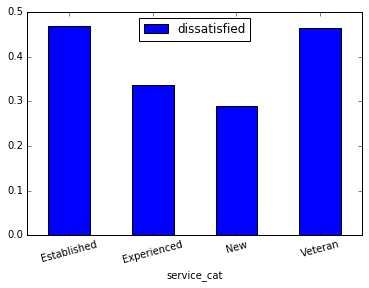

In [48]:
%matplotlib inline
table.plot(kind = 'bar', rot = 15)


From the bar chart above, we can say that most of the newer employees who resigned did not do so due to some dissatisfaction or the other. In fact, employees who had worked at the institutes for less than 3 years were less likely to resign due to dissatisfaction (29%) than all other groups. 

47% of the established employees (7+ years) who resigned did so due to some kind of disatisfaction or the other. That is similar to the case of veteran employees (11+ years), where 46% of those who resigned cited dissatisfaction as a reason.

I'll be looking at the ages of the resignees next.

In [36]:
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

I will share the ages into three categories:
+ ≤30: Those 30 years old or younger
+ 31-40: Those between the ages of 31 and 40
+ 41-55: Those between the ages of 41 and 55
+ ≥56: Those 56 years old or older

In [37]:
combined_updated['age_up'] = combined_updated['age'].astype('str').str.extract(r'(\d+)')
combined_updated['age_up'] = combined_updated['age_up'].astype('float')
combined_updated['age_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age_up, dtype: int64

In [38]:
def age_groups(val):
    if val <= 30:
        return '≤30'
    elif val <= 40:
        return '31-40'
    elif val <= 55:
        return '41-55'
    elif val >= 56:
        return '≥56'

combined_updated['age_cat'] = combined_updated['age_up'].apply(age_groups)
combined_updated['age_cat'].value_counts()


41-55    245
≤30      139
31-40    134
≥56       78
NaN       55
Name: age_cat, dtype: int64

Now, I want to see what percentage of each age group resigned due to some kind of dissatisfaction. I'll be using a pivot table for that, then a bar chart to visualise the results.

In [39]:
ages_table = pd.pivot_table(combined_updated, values = 'dissatisfied', index = 'age_cat')
ages_table

,dissatisfied
age_cat,
31-40,0.350746
41-55,0.375510
≤30,0.338129
≥56,0.410256


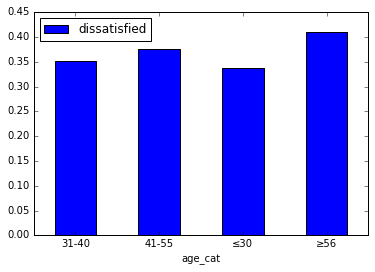

In [45]:
ages_table.plot(kind='bar', rot = 0)

The bar chart above shows that employees that were 30 or yoounger were the least likely to resign due to dissatisfaction (34%) while those 56 or older were the most likely to resign due to dissatisfaction (41%). 35% of resignees btween the ages of 31 and 40 cited dissatisfaction as a factor, and 38% of those between 